When you run a playbook and when Ansible connects to a target machine:
* It first collects **information about the machine**, such as its basic system information, like the **system architecture, version of operating system, processor details, memory details, serial numbers, etc.
* It collects **information about the host's network connectivity**, the different interfaces, IP addresses, FQDN, MAC address, etc.
* It also collects **device information** like the different disks, volumes, mounts, and the amount of space available on them, the date and time on those systems, and other settings as well.

All this information is known as **facts** in Ansible.
* Ansible gathers all these facts using the `setup` module.
* The `setup` module is run automatically by Ansible to gather facts about the hosts when you run a playbook, even if you didn't use this module in your playbook.

For example, in this sample playbook, where we **print a hello message**, we only have one task, the task that uses the `debug` module to print a message.

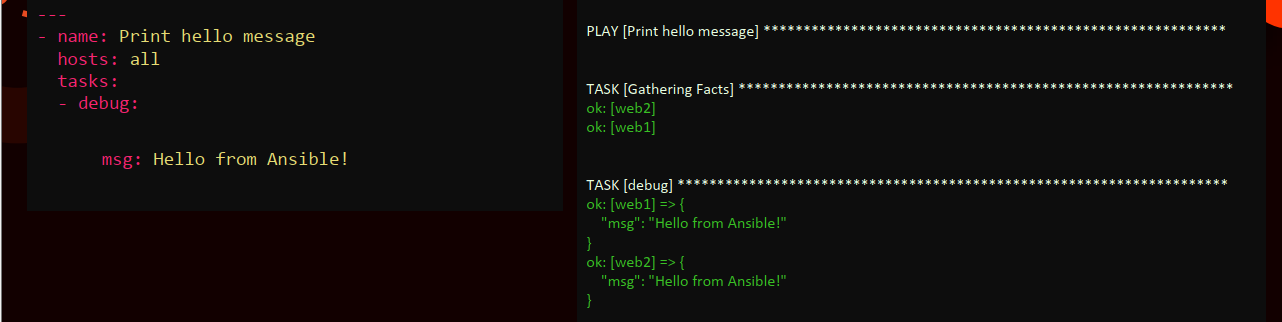

But in the output, you see that it's actually run two tasks.
* The first one gathers **facts**, and the second one **prints the message**, which was the only one we specified in our playbook, actually.
* The first task is where Ansible runs the `setup` module automatically and gathers facts from the hosts.


# How do you see the facts gathered by Ansible?

All facts gathered by Ansible are stored in a variable named `ansible_facts`.

Let's update our playbook to print that variable instead of the message.
* Use the `vars` option on the `debug` module and specify the `ansible_facts` variable.
* The output should display a lot of information about the host's IPs, whether a 64-bit or a 32-bit system, with flavor, version, DNS server configurations, FQDN, interfaces, memory details, device information, processor details, etc.
* These details could come in handy within your playbooks.
* For example, if you were configuring devices and logical volumes on your nodes, you could make certain decisions based on the information about disks gathered as facts.

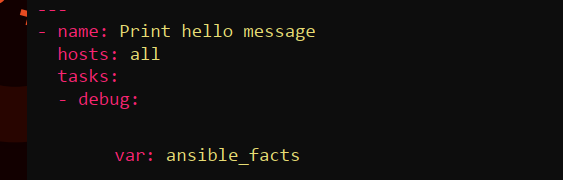

```json
PLAY [Reset nodes to previous state
] ************************************************

TASK [Gathering Facts
] **************************************************************
ok: [web2
]
ok: [web1
]


TASK [debug
] *******************************************************
ok: [web1
] => {
    "ansible_facts": {
        "all_ipv4_addresses": [
            "172.20.1.100"
        ],
        "architecture": "x86_64",
        "date_time": {
            "date": "2019-09-07",
        },
        "distribution": "Ubuntu",
        "distribution_file_variety": "Debian",
        "distribution_major_version": "16",
        "distribution_release": "xenial",
        "distribution_version": "16.04",
        "dns": {
            "nameservers": [
                "127.0.0.11"
            ],
        },
        "fqdn": "web1",
        "hostname": "web1",
        "interfaces": [
            "lo",
            "eth0"
        ],
        "machine": "x86_64",
        "memfree_mb": 72,
        "memory_mb": {
            "real": {
                "free": 72,
                "total": 985,
                "used": 913
            },
        },
        "memtotal_mb": 985,
        "module_setup": true,
        "mounts": [
            {
                "block_available": 45040,
                "block_size": 4096,
                "block_total": 2524608,
                "block_used": 2479568,
            },
        ],
        "nodename": "web1",
        "os_family": "Debian",
        "processor": [
            "0",
            "GenuineIntel",
            "Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz",
        ],
        "processor_cores": 2,
        "processor_count": 1,
        "processor_threads_per_core": 1,
        "processor_vcpus": 2,
        "product_name": "VirtualBox",
        "product_serial": "0",
        "product_uuid": "18A31B5D-FAC9-445F-9B6F-95B4B587F485",
        "product_version": "1.2",
    }
}
```

# What if you don't want Ansible to gather facts?

For example, your playbook does not rely on any information gathered from facts, so you would like to disable gathering facts.

You could do that by adding an option `gather_facts: no` on the play, like this.

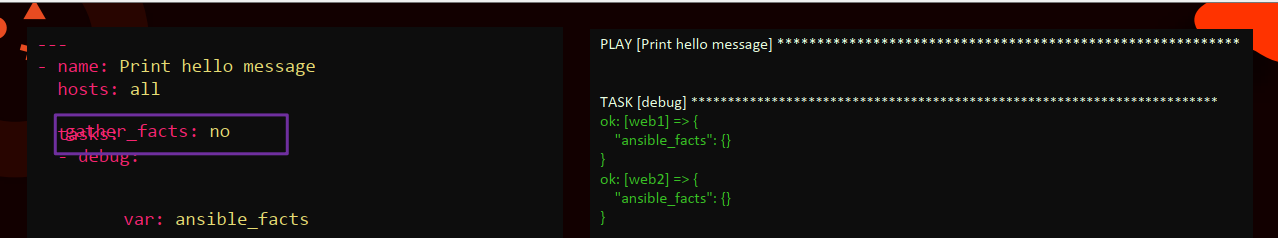

You would then see only a single task and no facts gathered.

The behavior of gathering facts is also governed by a **setting in the Ansible configuration file** called **Gathering**.
* It is by default set to **`implicit`**, meaning Ansible will automatically gather facts whether you specify it or not.
* Setting **`explicit`** is the opposite, where Ansible does not gather facts by default, but you can turn it on by setting the `gather_facts` to `true` in the playbook.

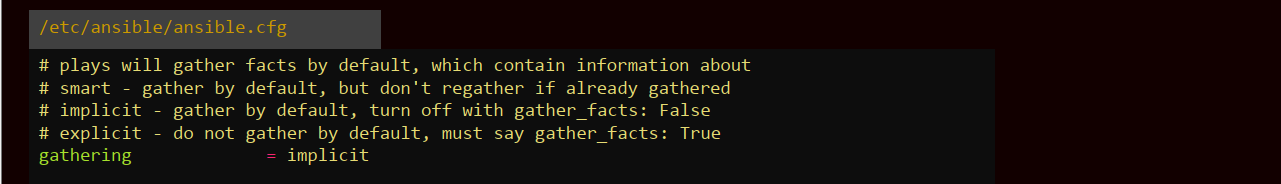

**What if you have it specified in both places, in the playbook as well as in the configuration file?**

The **setting in the playbook always takes precedence** over the one in the configuration file.
* One more thing, remember that Ansible only gathers facts against hosts that are part of the playbook.
* In this case, we have an inventory file with two hosts, `web1` and `web2`, and an Ansible playbook that targets only one host, `web1`.
* In this case, facts will be gathered only for that host, `web1`.

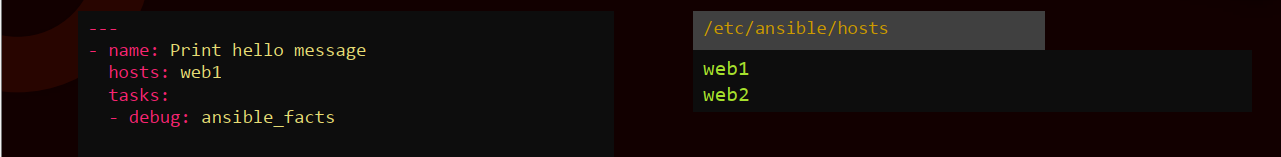

So anytime you come across a situation where facts for some hosts are unavailable, that could probably be because you have not targeted those hosts in your playbooks.

Later in this course, we will discuss more about how to parse these facts, and when we discuss about variables and templates, we'll look more into using some of the information in these facts.